In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../input/apple-aapl-historical-stock-data/HistoricalQuotes.csv')
df.columns = ['date', 'close', 'volume', 'open', 'high', 'low']


In [3]:
df.head()

,date,close,volume,open,high,low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:

df['close'] = df['close'].str.replace('$', '').astype(float)
df['open'] = df['open'].str.replace('$', '').astype(float)
df['high'] = df['high'].str.replace('$', '').astype(float)
df['low'] = df['low'].str.replace('$', '').astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: Future

In [5]:
df.head()

,date,close,volume,open,high,low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [6]:
df.sort_index(ascending =False, inplace =True)

In [7]:
df.head()

,date,close,volume,open,high,low
2517,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


In [8]:
df.reset_index(inplace = True)

In [9]:
df.head()

,index,date,close,volume,open,high,low
0,2517,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,2516,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


In [10]:
df.drop(['index'], axis = 'columns', inplace = True)

In [11]:
df.head()

,date,close,volume,open,high,low
0,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


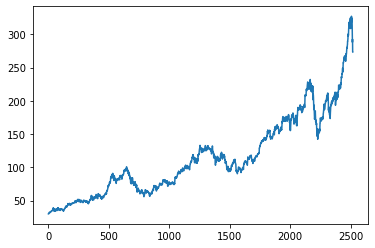

In [12]:
plt.plot(df['close'])

<AxesSubplot:ylabel='close'>

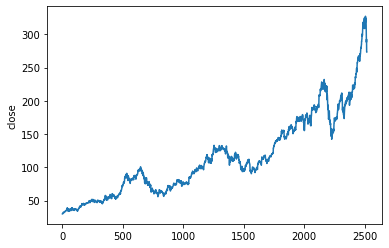

In [13]:
sns.lineplot(data = df, y= 'close', x= np.arange(2518))

In [14]:
df1 = df['close']

In [15]:
df1

0        29.8557
1        29.8357
2        29.9043
3        30.1014
4        31.2786
          ...   
2513    298.1800
2514    288.0800
2515    292.6500
2516    273.5200
2517    273.3600
Name: close, Length: 2518, dtype: float64

In [16]:
df1.shape

(2518,)

In [17]:
#LSTM sensitive to scale of data , we use Minmax scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1)) 
# here -1 in (-1,1 ) means that numpy should figure out the no. of rows, we just want 1 column and
# we specified just that

In [18]:
df1

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [19]:
train_size = int(len(df1)*0.6)
test_size = len(df1)-train_size
print(train_size, '\n', test_size)

1510 
 1008


In [20]:
train_data, test_data  = df1[0:train_size], df1[train_size:len(df1)]

In [21]:
test_data
test_data.shape

(1008, 1)

In [22]:
#experimenting to write the beloe code
c =[ [1],[2],[3],[5],[7],[5],[8],[6],[11]]
b = []
c = np.array(c)
print('The problem:\n\n', c[0:3], '\n\n')
print('The solution:', c[0:3,0])


The problem:

 [[1]
 [2]
 [3]] 


The solution: [1 2 3]


In [23]:
# Data Preprocessing to feed into the model, see blog on LSTM for time series
# if our data is [1,2,3,5,7,5,8,6,]
# Our feature column and target column will look like this, here timesteps taken is 3

# f1  f2  f3  y
# 1   2   3   5
# 2   3   5   7
# 3   5   7   5
# 5   7   5   8
# 7   5   8   6

def create_dataset(dataset, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_steps - 1):
    
    # 0 to 99 values vales stored in x as one list   
        data_x.append(dataset[i:(i+time_steps),0])
        
    #100th value is stored as y or target as a list
        data_y.append(dataset[i+time_steps, 0])
        
    # returning numpy array from lists
    return np.array(data_x), np.array(data_y)

In [24]:
time_steps =100
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test   = create_dataset(test_data, time_steps)

In [25]:
print(x_train, '\n\n')
print(y_train)

[[6.72575693e-05 0.00000000e+00 2.30693463e-04 ... 1.76453596e-02
  2.06769945e-02 2.18059128e-02]
 [0.00000000e+00 2.30693463e-04 8.93516807e-04 ... 2.06769945e-02
  2.18059128e-02 2.41041040e-02]
 [2.30693463e-04 8.93516807e-04 4.85229733e-03 ... 2.18059128e-02
  2.41041040e-02 2.45443047e-02]
 ...
 [2.66421692e-01 2.70591661e-01 2.68170389e-01 ... 2.23376848e-01
  2.22637015e-01 2.25461833e-01]
 [2.70591661e-01 2.68170389e-01 2.70860692e-01 ... 2.22637015e-01
  2.25461833e-01 2.18097129e-01]
 [2.68170389e-01 2.70860692e-01 2.72205843e-01 ... 2.25461833e-01
  2.18097129e-01 2.22838787e-01]] 


[0.0241041  0.0245443  0.02422719 ... 0.21809713 0.22283879 0.22505829]


In [26]:
print('rows: ',x_train.shape[0], '\n\n')
print('no. of values in each row: ',x_train.shape[1])

rows:  1409 


no. of values in each row:  100


In [27]:
#reshape input to be [samples, time_steps, features] is required for LSTM
# timesteps should be equal to x_train.shape[1]

x_train = x_train.reshape(x_train.shape[0], time_steps, 1)
x_test = x_test.reshape(x_test.shape[0], time_steps, 1)

In [28]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [29]:
from tensorflow.keras import layers, callbacks

In [30]:
x_train

array([[[6.72575693e-05],
        [0.00000000e+00],
        [2.30693463e-04],
        ...,
        [1.76453596e-02],
        [2.06769945e-02],
        [2.18059128e-02]],

       [[0.00000000e+00],
        [2.30693463e-04],
        [8.93516807e-04],
        ...,
        [2.06769945e-02],
        [2.18059128e-02],
        [2.41041040e-02]],

       [[2.30693463e-04],
        [8.93516807e-04],
        [4.85229733e-03],
        ...,
        [2.18059128e-02],
        [2.41041040e-02],
        [2.45443047e-02]],

       ...,

       [[2.66421692e-01],
        [2.70591661e-01],
        [2.68170389e-01],
        ...,
        [2.23376848e-01],
        [2.22637015e-01],
        [2.25461833e-01]],

       [[2.70591661e-01],
        [2.68170389e-01],
        [2.70860692e-01],
        ...,
        [2.22637015e-01],
        [2.25461833e-01],
        [2.18097129e-01]],

       [[2.68170389e-01],
        [2.70860692e-01],
        [2.72205843e-01],
        ...,
        [2.25461833e-01],
        [2.1809

In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (time_steps,1)) )
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
#Adding Early stopping to reduce time unwanted training time
early_stopping = callbacks.EarlyStopping(
               min_delta = 0.001, # minimium amount of change to count as an improvement
               patience  = 20,    # how many epochs to wait before stopping
    restore_best_weights = True)

In [33]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, callbacks = [early_stopping], batch_size =64 , verbose =1)

Epoch 1/100
23/23 [==============================] - 9s 256ms/step - loss: 0.0134 - val_loss: 0.0057
Epoch 2/100
23/23 [==============================] - 5s 204ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 3/100
23/23 [==============================] - 5s 211ms/step - loss: 2.8091e-04 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 5s 214ms/step - loss: 1.7842e-04 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 5s 216ms/step - loss: 1.7959e-04 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 5s 213ms/step - loss: 2.0955e-04 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 5s 210ms/step - loss: 1.9099e-04 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 5s 210ms/step - loss: 1.7978e-04 - val_loss: 0.0017
Epoch 9/100
23/23 [==============================] - 5s 209ms/step - loss: 1.6959e-04 - val_loss: 0.0026
Epoch 10/100
23/23 [==============================] - 5s 211ms/

In [34]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [35]:
#Converting predicted values back to non scaled values
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

In [36]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

79.9216457356482
177.20539998310412


In [37]:
train_predict.shape

(1409, 1)

In [38]:
test_predict.shape

(907, 1)

In [39]:
y_test_i = y_test.reshape(907,1)

In [40]:
y_train_i = y_train.reshape(1409,1)

In [41]:
y_train_i = scaler.inverse_transform(y_train_i)

<AxesSubplot:>

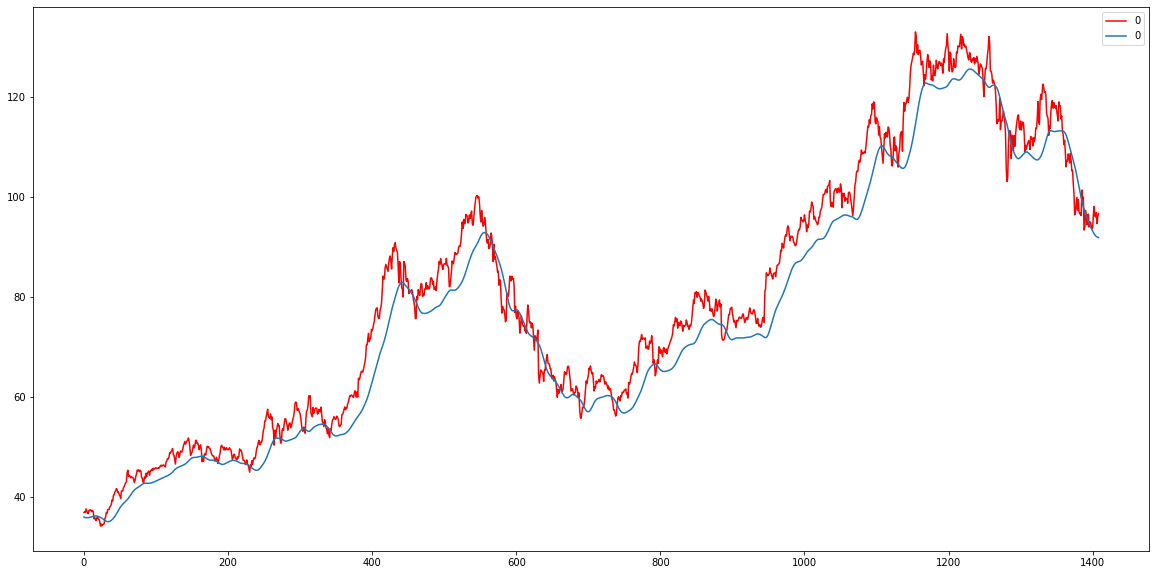

In [42]:

plt.figure(figsize = (20,10))
sns.lineplot(data = y_train_i , palette = ['red'])
sns.lineplot(data = train_predict)


In [43]:
y_test_i = scaler.inverse_transform(y_test_i)

<AxesSubplot:>

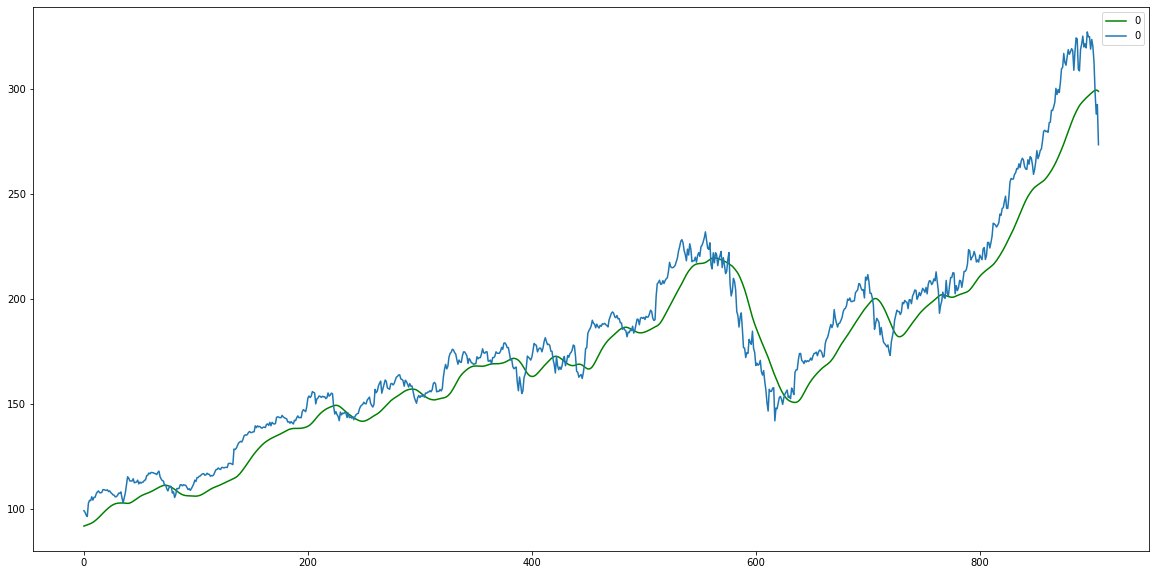

In [44]:
plt.figure(figsize = (20,10))
sns.lineplot(data = test_predict, palette = ['green'] )
sns.lineplot(data = y_test_i)

In [45]:
test_data.shape

(1008, 1)

In [53]:
df1.shape

(2518, 1)

In [90]:
x_input = df1[2018:].reshape(1,-1)
x_input.shape

(1, 500)

In [91]:
temp_input = x_input
temp_input = temp_input[0].tolist()
#temp_input

In [ ]:
temp_input

In [93]:
len(temp_input)

500

In [94]:
time_steps = 500
list_output = []
i=0

while(i<300):
    if((len(temp_input) > time_steps)):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        
        x_input = x_input.reshape((1, time_steps, 1))
        y_hat   = model.predict(x_input, verbose = 0)
        
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        list_output.extend(y_hat.tolist())
        i = i +1
    else:
        x_input = x_input.reshape((1, time_steps, 1))
        y_hat   = model.predict(x_input, verbose = 0)
        temp_input.extend(y_hat[0].tolist())
        list_output.extend(y_hat.tolist())
        i = i +1
print(list_output)

[[0.8989099860191345], [0.8946810364723206], [0.8902133107185364], [0.8857256174087524], [0.8813439011573792], [0.877132773399353], [0.8731182217597961], [0.8693010807037354], [0.865668773651123], [0.8622025847434998], [0.8588814735412598], [0.8556845784187317], [0.8525950312614441], [0.8495960831642151], [0.8466750979423523], [0.843822181224823], [0.8410288691520691], [0.8382891416549683], [0.835597813129425], [0.8329513072967529], [0.8303471207618713], [0.8277824521064758], [0.8252559900283813], [0.8227658867835999], [0.8203113079071045], [0.8178908228874207], [0.8155036568641663], [0.8131493330001831], [0.8108263611793518], [0.8085342645645142], [0.8062722086906433], [0.8040392994880676], [0.8018351197242737], [0.7996590733528137], [0.7975102663040161], [0.7953882217407227], [0.7932921648025513], [0.7912214398384094], [0.7891754508018494], [0.7871540188789368], [0.7851561903953552], [0.7831815481185913], [0.7812296748161316], [0.7793000936508179], [0.7773919105529785], [0.7755051851

In [101]:
day_new = np.arange(1,501)
day_pred = np.arange(501, 801)

In [100]:
len(list_output)

300

In [96]:
df3= df1.tolist()
df3.extend(list_output)

In [97]:
len(df3)

2818

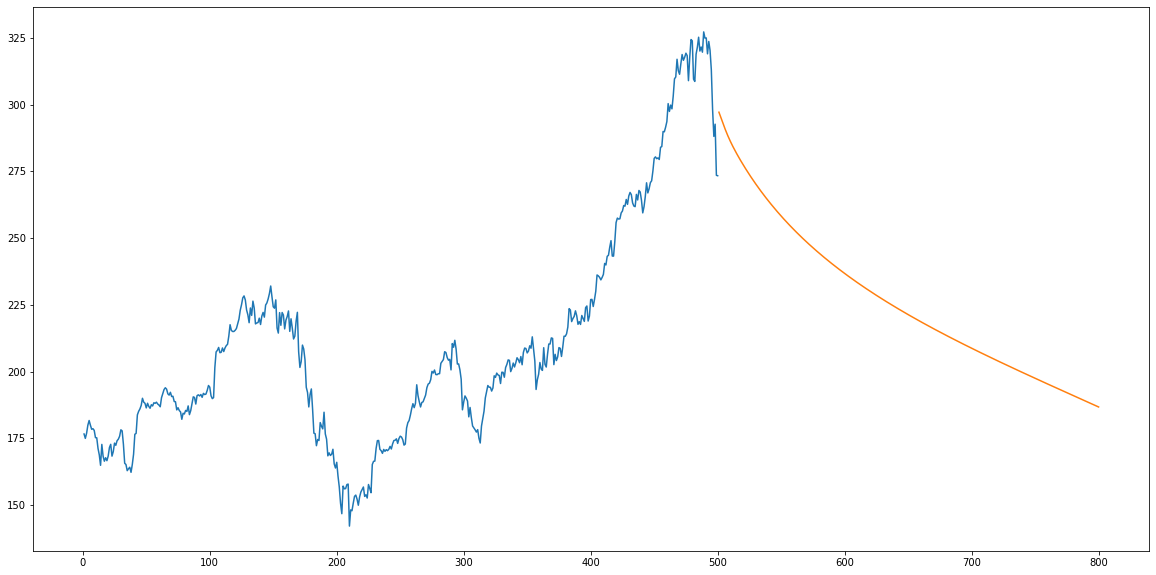

In [102]:
plt.figure(figsize = (20,10))
plt.plot(day_new, scaler.inverse_transform(df1[2018:]))
plt.plot(day_pred, scaler.inverse_transform(list_output))

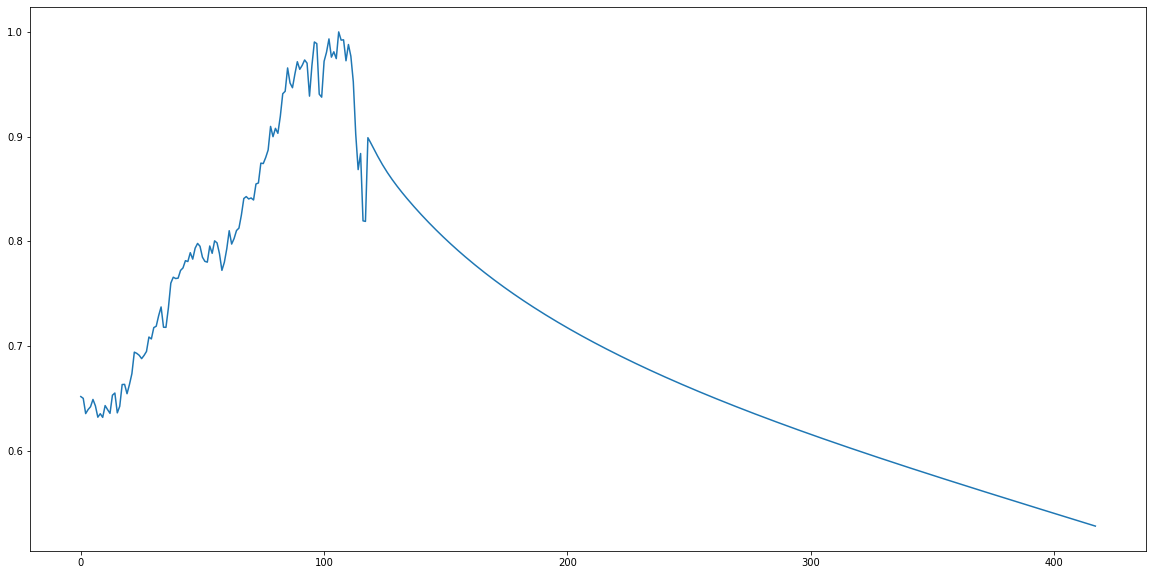

In [103]:
plt.figure(figsize = (20,10))
plt.plot(df3[2400:])